In [12]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from IPython.display import clear_output

In [27]:
def find_common_tangent(x1, y1, x2, y2):    
    marr1 = np.array([]) #initialize slope and y intercept arrays
    marr2 = np.array([])
    barr1 = np.array([])
    barr2 = np.array([])
    
    for i in range(len(x1)-1): #calculate slope and y intercept for curve 1
        mval = (y1[i] - y1[i+1])/(x1[i]-x1[i+1])
        bval = y1[i] - mval*x1[i]
        marr1 = np.append(marr1, mval)
        barr1 = np.append(barr1, bval)
    
    for i in range(len(x2)-1): #calculate slope and y intercept for curve 2
        mval = (y2[i] - y2[i+1])/(x2[i]-x2[i+1])
        bval = y2[i] - mval*x2[i]
        marr2 = np.append(marr2, mval)
        barr2 = np.append(barr2, bval)
    
    dm = abs(marr1[0] - marr2[0])
    db = abs(barr1[0] - barr2[0])
    for i in range(len(marr1)): #simultaneously minimize difference
        for j in range(len(marr2)):
            if dm > abs(marr1[i]-marr2[j]) and db > abs(barr1[i]-barr2[j]):
                dm = abs(marr1[i]-marr2[j])
                db = abs(barr1[i]-barr2[j])
                m1 = marr1[i]
                m2 = marr2[j]
                b1 = barr1[i]
                b2 = barr2[j]
                
                u1 = x1[i]
                u2 = x2[j]
                v1 = y1[i]
                v2 = y2[j]
                
    mfinal = (v1-v2)/(u1-u2)
    bfinal = v2 - mfinal*u2
    print "Coordinates of points of tangency are: (%1.4f, %1.4f) and (%1.4f, %1.4f)" % (u1, v1, u2, v2)
    print "A0 = ", bfinal, ", A1 = ", mfinal
    return u1, u2

In [2]:
hw5x1 = pd.read_clipboard(header=None)

In [3]:
hw5y1 = pd.read_clipboard(header=None)

In [5]:
hw5y2 = pd.read_clipboard(header=None)

In [4]:
hw5x2 = pd.read_clipboard(header=None)

In [7]:
%matplotlib inline

import matplotlib as mpl
import matplotlib.font_manager

f_size = 14
mpl.rcParams['xtick.labelsize']=f_size
mpl.rcParams['ytick.labelsize']=f_size
mpl.rcParams['axes.labelweight']='light'
mpl.rcParams['axes.labelsize']=f_size
mpl.rcParams['font.size']=f_size
mpl.rcParams['font.family']='sans-serif'
mpl.rcParams['font.sans-serif']='Arial'
mpl.rcParams['font.style']='normal'
mpl.rcParams['font.weight']='light'
mpl.rcParams['mathtext.fontset'] = 'custom'
mpl.rcParams['mathtext.rm'] = 'Arial'
mpl.rcParams["figure.figsize"] = (8,5)

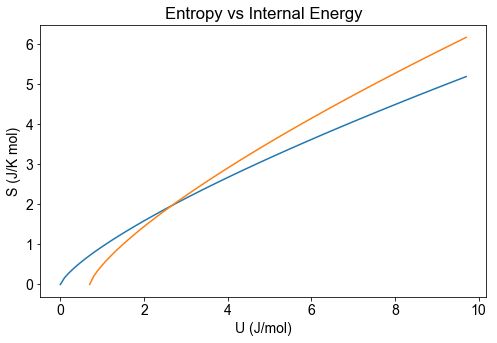

In [15]:
p = plt.plot(hw5x1, hw5y1, hw5x2, hw5y2)
plt.title("Entropy vs Internal Energy")
plt.xlabel(r"U (J/mol)")
plt.ylabel("S (J/K mol)")
plt.show()

In [10]:
hw5x1 = hw5x1.values
hw5y1 = hw5y1.values
hw5x2 = hw5x2.values
hw5y2 = hw5y2.values

In [20]:
m1, b1 = find_common_tangent(hw5x1, hw5y1, hw5x2, hw5y2)

Coordinates of points of tangency are: (1.4000, 1.2134) and (4.3000, 3.0984)
A0 =  [ 0.30347178] , A1 =  [ 0.64998021]


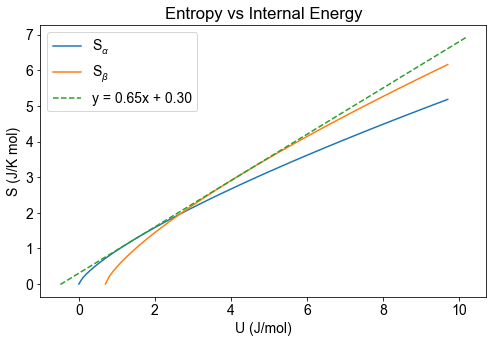

In [18]:
fig, ax = plt.subplots()
p1 = plt.plot(hw5x1, hw5y1, label=r'S$_{\alpha}$')
p2 = plt.plot(hw5x2, hw5y2, label=r'S$_{\beta}$')
x_line = np.array(ax.get_xlim())
y_line1 = b1 + m1*x_line
labelstring = 'y = %1.2fx + %1.2f' % (m1, b1)
p3 = plt.plot(x_line, y_line1, '--', label=labelstring)

plt.title("Entropy vs Internal Energy")
plt.xlabel(r"U (J/mol)")
plt.ylabel("S (J/K mol)")

legend = ax.legend(loc='upper left')
plt.show()
# p4 = plt.plot(x_line, y_line2, '--')

Coordinates of points of tangency are: (0.0059, -12912.9250) and (0.0157, -10950.2156)
A0 =  -14081.2044902 , A1 =  199608.889351


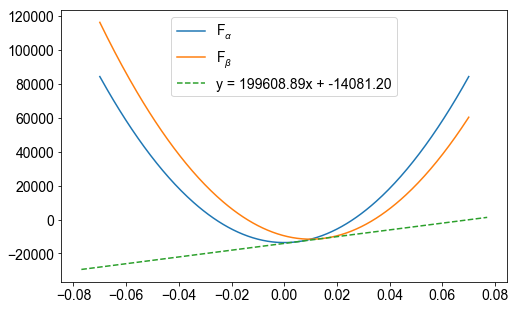

In [23]:
ua0 = 0
ub0 = 13333.0
a = 1.2
b = 2.2
E = 4.0e7
de = 0.01
t = 19.203

e_line = np.linspace(-.07, .07, num=300)
fa = ua0 - (a*(t**4))/12 + 0.5*E*(np.square(e_line))
fb = ub0 - (b*(t**4))/12 + 0.5*E*(np.square(e_line-de))

me, be = find_common_tangent(e_line, fa, e_line, fb)

fig, ax = plt.subplots()
p1 = plt.plot(e_line, fa, label = r'F$_{\alpha}$')
p2 = plt.plot(e_line, fb, label = r'F$_{\beta}$')

x_line = np.array(ax.get_xlim())
y_line = be + me*x_line
labelstring = 'y = %1.2fx + %1.2f' % (me, be)
p3 = plt.plot(x_line, y_line, '--', label=labelstring)

legend = ax.legend(loc='upper center')

In [28]:
e_line = np.linspace(-.07, .07, num=4000)

trange = np.linspace(19, 21, num=200)

e_1 = np.array([])
e_2 = np.array([])
for temp in trange:
    clear_output(wait=True)
    fa = ua0 - (a*(temp**4))/12 + 0.5*E*(np.square(e_line))
    fb = ub0 - (b*(temp**4))/12 + 0.5*E*(np.square(e_line-de))
    u1, u2 = find_common_tangent(e_line, fa, e_line, fb)
    e_1 = np.append(e_1, u1)
    e_2 = np.append(e_2, u2)
    print temp

Coordinates of points of tangency are: (-0.0448, 20744.1597) and (-0.0443, 36731.7856)
A0 =  1483040.9415 , A1 =  32619650.9748
21.0


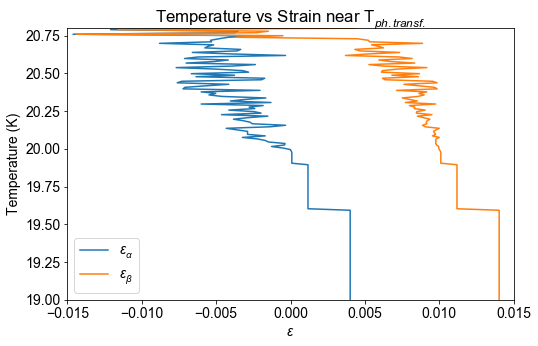

In [33]:
fig, ax = plt.subplots()
p1 = plt.plot(e_1, trange, label=r'$\epsilon_{\alpha}$')
p2 = plt.plot(e_2, trange, label=r'$\epsilon_{\beta}$')

legend = ax.legend(loc="lower left")
title = plt.title(r'Temperature vs Strain near T$_{ph. transf.}$')
plt.xlabel(r'$\epsilon$')
plt.ylabel(r'Temperature (K)')
ax.set_xlim(-0.015, 0.015)
ax.set_ylim(19, 20.8)
plt.show()

In [30]:
t1_star = (12*((ub0-ua0)+0.5*E*(de**2))/(b-a))**(0.25)
t1_star

20.711048965254342

In [31]:
t2_star = (12*((ua0-ub0)+0.5*E*(de**2))/(a-b))**(0.25)
t2_star

19.203550582910246

In [240]:
t1_star-t2_star

1.507498382344096